## IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os, json, math, time
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

### Check Data Files

In [2]:
FOLDER = 'Data/'
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['final_akas.csv.gz',
 'final_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'tmdb_api_results_2001.json',
 'title_basics.csv.gz',
 'final_basics.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 '.ipynb_checkpoints',
 'title_akas.csv.gz',
 'title_ratings.csv.gz']

## LOAD DATA

In [3]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2174.0,PG


In [4]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1232 non-null   object 
 1   adult                  1231 non-null   float64
 2   backdrop_path          674 non-null    object 
 3   belongs_to_collection  112 non-null    object 
 4   budget                 1231 non-null   float64
 5   genres                 1231 non-null   object 
 6   homepage               64 non-null     object 
 7   id                     1231 non-null   float64
 8   original_language      1231 non-null   object 
 9   original_title         1231 non-null   object 
 10  overview               1208 non-null   object 
 11  popularity             1231 non-null   float64
 12  poster_path            1107 non-null   object 
 13  production_companies   1231 non-null   object 
 14  production_countries   1231 non-null   object 
 15  rele

In [5]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1181.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.524,123.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,29.0,R


In [6]:
df_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1323 non-null   object 
 1   adult                  1322 non-null   float64
 2   backdrop_path          705 non-null    object 
 3   belongs_to_collection  92 non-null     object 
 4   budget                 1322 non-null   float64
 5   genres                 1322 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1322 non-null   float64
 8   original_language      1322 non-null   object 
 9   original_title         1322 non-null   object 
 10  overview               1293 non-null   object 
 11  popularity             1322 non-null   float64
 12  poster_path            1188 non-null   object 
 13  production_companies   1322 non-null   object 
 14  production_countries   1322 non-null   object 
 15  rele

## Combine Data into One DataFrame

In [7]:
df = pd.concat([df_2000, df_2001], axis = 0)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2174.0,PG


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 1322
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2555 non-null   object 
 1   adult                  2553 non-null   float64
 2   backdrop_path          1379 non-null   object 
 3   belongs_to_collection  204 non-null    object 
 4   budget                 2553 non-null   float64
 5   genres                 2553 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2553 non-null   float64
 8   original_language      2553 non-null   object 
 9   original_title         2553 non-null   object 
 10  overview               2501 non-null   object 
 11  popularity             2553 non-null   float64
 12  poster_path            2295 non-null   object 
 13  production_companies   2553 non-null   object 
 14  production_countries   2553 non-null   object 
 15  rele

## Perform EDA

#### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [9]:
fin_info =(df['budget'] > 0) | (df['revenue'] > 0)

In [10]:
fin_info.value_counts()

False    1921
True      634
dtype: int64

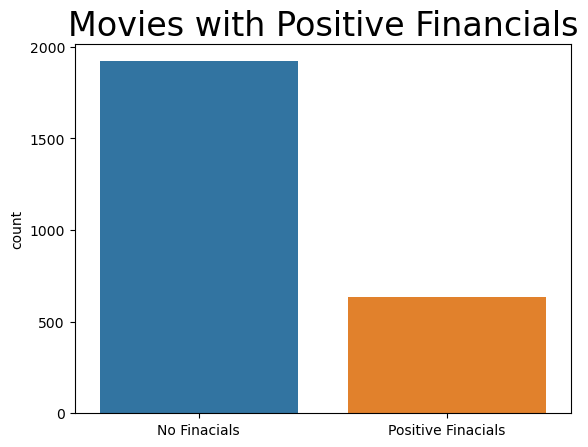

In [11]:
g = sns.countplot(x = fin_info);
sns.set_context('poster')
plt.title('Movies with Positive Financials');
g.set_xticklabels(['No Finacials','Positive Finacials']);

#### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [12]:
df['certification'].value_counts()

R          461
PG-13      183
NR          73
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

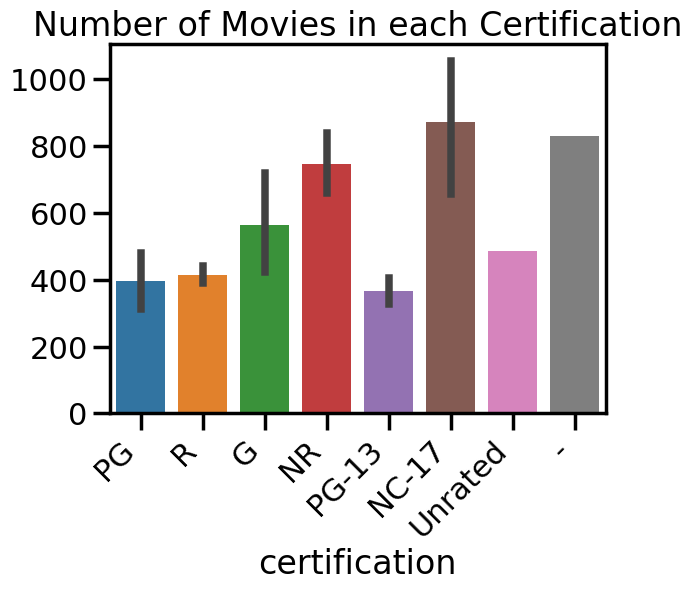

In [13]:
sns.barplot(x=df.certification,
           y=df.index)
sns.set_context('poster')
plt.title('Number of Movies in each Certification');
plt.xticks(rotation=45, horizontalalignment='right');
plt.show();

#### What is the average revenue per certification category?

In [14]:
df.groupby('certification')['revenue'].mean().round(4)

certification
-          0.000000e+00
G          7.218533e+07
NC-17      0.000000e+00
NR         2.232979e+06
PG         6.291035e+07
PG-13      7.105711e+07
R          1.631907e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

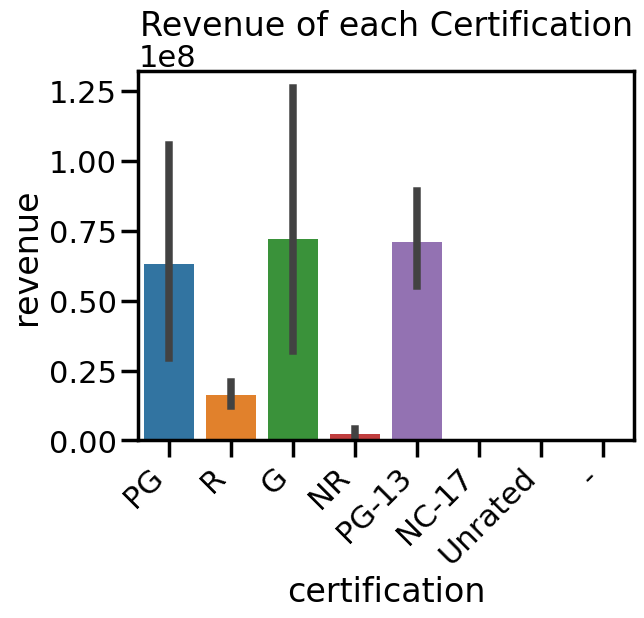

In [15]:
sns.barplot(x='certification',
           y='revenue',
           data = df);
sns.set_context('poster');
plt.title('Revenue of each Certification');
plt.xticks(rotation=45, horizontalalignment='right');
plt.show();

#### What is the average budget per certification category?

In [16]:
df.groupby('certification')['budget'].mean().round(4)

certification
-          0.000000e+00
G          2.383333e+07
NC-17      0.000000e+00
NR         1.467673e+06
PG         2.528221e+07
PG-13      3.078775e+07
R          9.747515e+06
Unrated    0.000000e+00
Name: budget, dtype: float64

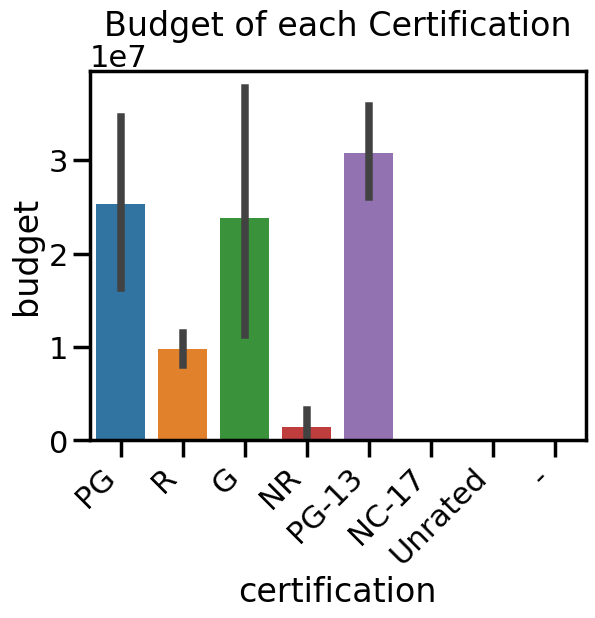

In [17]:
sns.barplot(x='certification',
           y='budget',
           data = df);
sns.set_context('poster')
plt.title('Budget of each Certification');
plt.xticks(rotation=45, horizontalalignment='right');
plt.show();

In [18]:
tmdb_results_combined = df

In [19]:
tmdb_results_combined.to_csv("Data/tmdb_results_combined.csv.gz", compression = 'gzip', index = False)
tmdb_results_combined.head()


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2174.0,PG
